In [4]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
from itertools import combinations 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestRegressor
import random 

In [5]:
df = pd.read_csv('ISLR-python/Notebooks/Data/College.csv')

In [6]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [7]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [9]:
df['Accept.Rate'] = df['Accept'] / df['Apps']

In [10]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Accept.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0.742169
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0.880146
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0.768207
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0.836930
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0.756477


In [11]:
df = pd.get_dummies(df, columns = ['Private'])

In [12]:
X = df.drop(['Accept.Rate', 'Apps', 'Accept', 'Unnamed: 0', 'Private_No'], axis = 1)
y = df['Accept.Rate']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101, test_size = 0.2)

In [14]:
X_train.head()

,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
452,169,28,48,797,100,6000,3000,500,500,48,57,13.4,14,5557,61,1
351,176,26,52,624,128,11200,4208,500,1642,80,90,11.1,43,8317,51,1
68,292,22,53,881,55,10265,4725,560,875,68,73,13.2,24,8655,82,1
274,5873,25,72,24763,2717,9766,3990,600,2000,77,88,21.3,24,8686,68,0
12,290,38,64,1130,638,9690,4785,600,1000,60,84,13.3,21,7940,74,1


In [15]:
model = DecisionTreeRegressor(random_state = 101)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=101)

In [16]:
y_predictions = model.predict(X_test)

In [17]:
print("The mean squared error for Decision Tree Regressor is: {}".format(mean_squared_error(y_predictions, y_test)))

The mean squared error for Decision Tree Regressor is: 0.025724533262615167


In [18]:
X_train.columns

Index(['Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad',
       'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal',
       'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate', 'Private_Yes'],
      dtype='object')

In [19]:
y_train.head()

452    0.990099
351    0.606557
68     0.803103
274    0.798396
12     0.661578
Name: Accept.Rate, dtype: float64

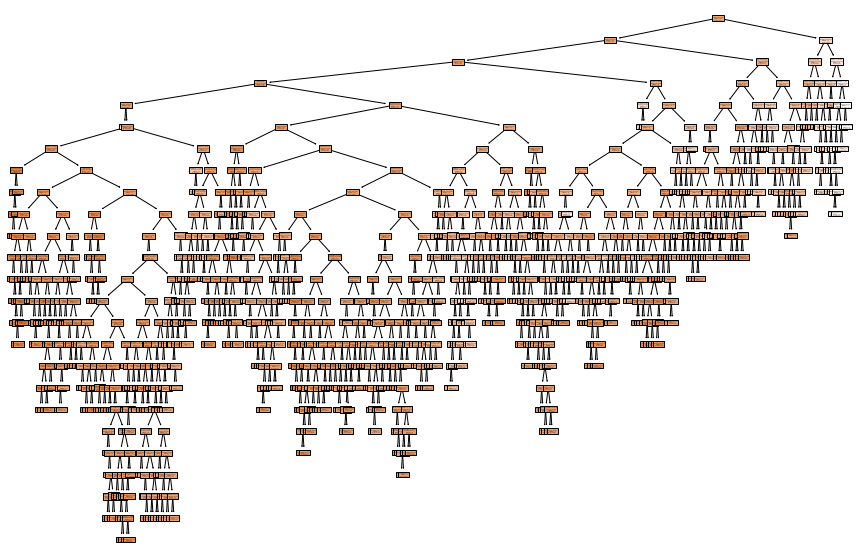

In [20]:
fig = plt.figure(figsize = (15, 10))
plot_tree(model, feature_names = X_train.columns, filled = True)
plt.show()

In [21]:
y_predictions = model.predict(X_test)

In [22]:
dataframe_evaluation = pd.DataFrame({'y actual values': y_test, 'y predictions': y_predictions})

In [23]:
dataframe_evaluation.head()

,y actual values,y predictions
659,0.815396,0.886159
237,0.681216,0.440000
42,0.781646,0.879826
699,0.804898,0.742169
550,0.518657,0.578856


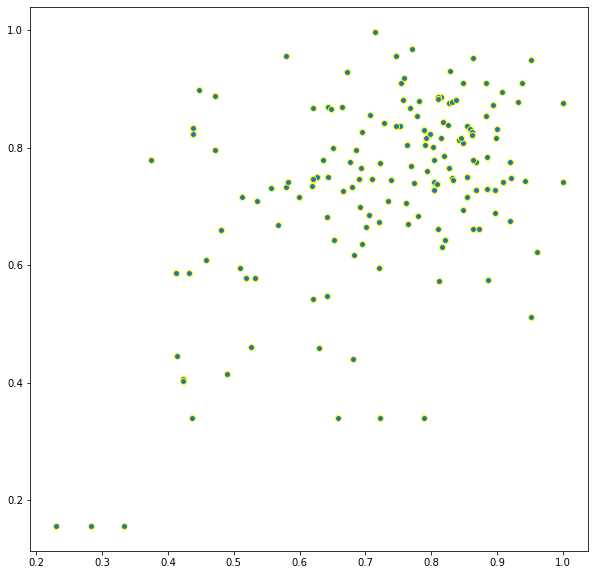

In [24]:
plt.figure(figsize = (10, 10))
plt.scatter(x = 'y actual values', y = 'y predictions', edgecolor = 'yellow', data = dataframe_evaluation)
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

In [26]:
print("The mean squared error of the test set is: {}"
      .format(mean_squared_error(dataframe_evaluation['y actual values'],  dataframe_evaluation['y predictions'])))

The mean squared error of the test set is: 0.025724533262615167


## b) 
When we just pick a decision tree without specifying the depth, it would go till the maximum depth until values don't split further. As a result, we see that the decision tree is fully grown and it takes into account many features before coming to a conclusion for the acceptance rate. 

The mean squared error of the test set is 0.02469 respectively.

In [27]:
X_train.head()

,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
452,169,28,48,797,100,6000,3000,500,500,48,57,13.4,14,5557,61,1
351,176,26,52,624,128,11200,4208,500,1642,80,90,11.1,43,8317,51,1
68,292,22,53,881,55,10265,4725,560,875,68,73,13.2,24,8655,82,1
274,5873,25,72,24763,2717,9766,3990,600,2000,77,88,21.3,24,8686,68,0
12,290,38,64,1130,638,9690,4785,600,1000,60,84,13.3,21,7940,74,1


In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
import sklearn

In [30]:
tree_depth_values = [2, 3, 4, 5, 10, 15]
cv = 10
MSE_values = []
for depth in tree_depth_values:
    model = DecisionTreeRegressor(max_depth = depth, random_state = 101)
    cross_validation_scores = -cross_val_score(model, X_train, y_train, cv = cv, scoring = 'neg_mean_squared_error').mean()
    MSE_values.append(cross_validation_scores)    

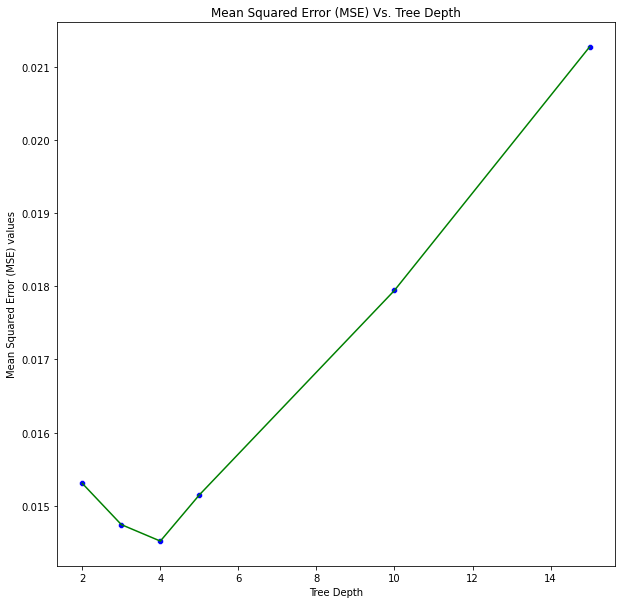

In [31]:
plt.figure(figsize = (10, 10))
sns.lineplot(x = tree_depth_values, y = MSE_values, color = 'green')
sns.scatterplot(x = tree_depth_values, y = MSE_values, color = 'blue')
plt.xlabel("Tree Depth")
plt.ylabel("Mean Squared Error (MSE) values")
plt.title("Mean Squared Error (MSE) Vs. Tree Depth")
plt.show()

In [32]:
min_samples_split_values = [15, 20, 50, 75, 100, 150, 200, 400, 500]
MSE_values = []
cv = 10
for min_samples in min_samples_split_values:
    model = DecisionTreeRegressor(min_samples_split = min_samples, random_state = 101)
    cross_validation_scores = -cross_val_score(model, X_train, y_train, cv = cv, scoring = 'neg_mean_squared_error').mean()
    MSE_values.append(cross_validation_scores)
    

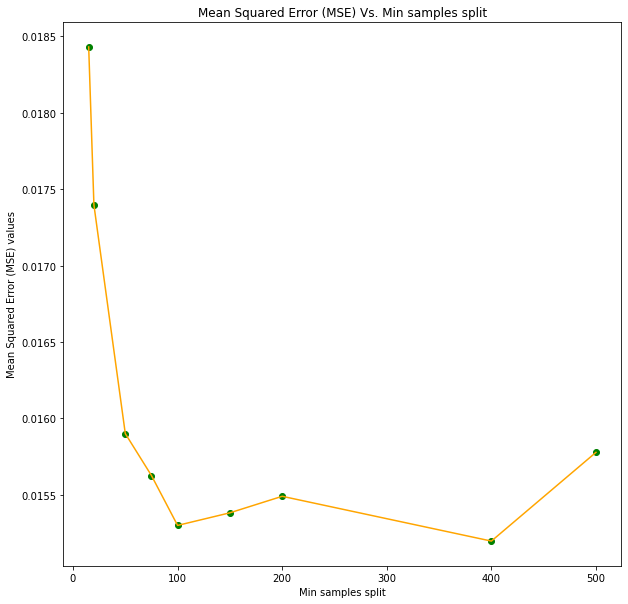

In [33]:
plt.figure(figsize = (10, 10))
sns.lineplot(x = min_samples_split_values, y = MSE_values, color = 'orange')
plt.scatter(x = min_samples_split_values, y = MSE_values, color = 'green')
plt.xlabel("Min samples split")
plt.ylabel("Mean Squared Error (MSE) values")
plt.title("Mean Squared Error (MSE) Vs. Min samples split")
plt.show()

In [34]:
min_samples_leaf_values = [15, 20, 50, 75, 100, 150, 200, 400, 500]
MSE_values = []
cv = 10
for min_samples_leaf in min_samples_leaf_values:
    model = DecisionTreeRegressor(min_samples_leaf = min_samples_leaf, random_state = 101)
    cross_validation_scores = -cross_val_score(model, X_train, y_train, cv = cv, scoring = 'neg_mean_squared_error').mean()
    MSE_values.append(cross_validation_scores)
    

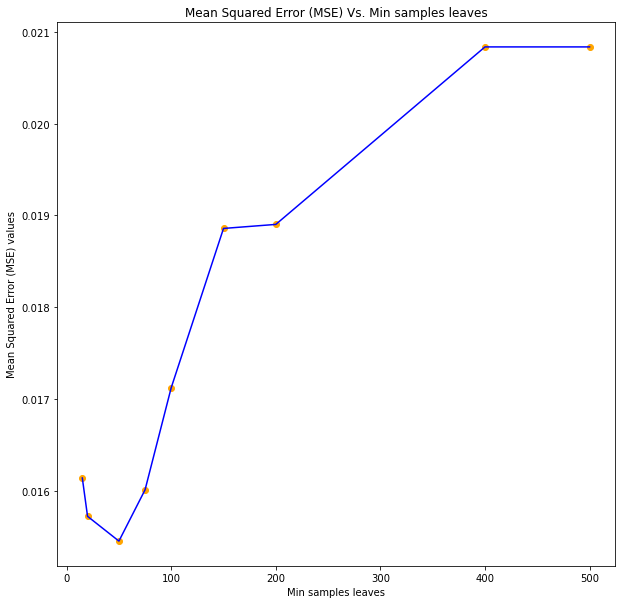

In [35]:
plt.figure(figsize = (10, 10))
sns.lineplot(x = min_samples_leaf_values, y = MSE_values, color = 'blue')
plt.scatter(x = min_samples_leaf_values, y = MSE_values, color = 'orange')
plt.xlabel("Min samples leaves")
plt.ylabel("Mean Squared Error (MSE) values")
plt.title("Mean Squared Error (MSE) Vs. Min samples leaves")
plt.show()

In [36]:
best_min_samples_split = 100
best_min_samples_leaves = 50
best_depth = 4

In [37]:
model = DecisionTreeRegressor(min_samples_split = best_min_samples_split, min_samples_leaf = best_min_samples_leaves,
                             max_depth = best_depth, random_state = 101)

In [38]:
model.fit(X_train, y_train)
y_predictions = model.predict(X_test)

In [39]:
print("The mean squared error of the best tree is: {}".format(mean_squared_error(y_predictions, y_test)))

The mean squared error of the best tree is: 0.016944450242913314


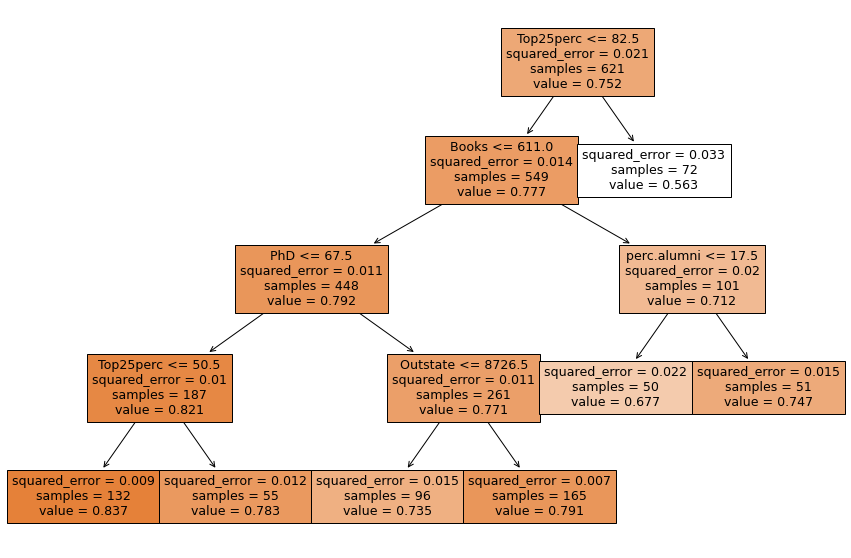

In [40]:
fig = plt.figure(figsize = (15, 10))
plot_tree(model, feature_names = X_train.columns, filled = True)
plt.show()

## c)

Based on the results from getting the best tree, we see that the mean square error reduced from 0.025 to 0.016 with the best values of max_depth, min_samples_split and min_samples_leaf respectively. 

The plot that we see above is quite readable and it points to the best features that were important to split the data into categories for better interpretability. The plot that we've seen in b) model takes a lot of parameters and it reaches the full depth of the tree. 

In [41]:
from sklearn.utils import resample

In [42]:
training_data = pd.concat([X_train, y_train], axis = 1, ignore_index = True)
testing_data = pd.concat([X_test, y_test], axis = 1, ignore_index = True)

In [43]:
training_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
452,169,28,48,797,100,6000,3000,500,500,48,57,13.4,14,5557,61,1,0.990099
351,176,26,52,624,128,11200,4208,500,1642,80,90,11.1,43,8317,51,1,0.606557
68,292,22,53,881,55,10265,4725,560,875,68,73,13.2,24,8655,82,1,0.803103
274,5873,25,72,24763,2717,9766,3990,600,2000,77,88,21.3,24,8686,68,0,0.798396
12,290,38,64,1130,638,9690,4785,600,1000,60,84,13.3,21,7940,74,1,0.661578


In [44]:
training_data_len = len(training_data)
testing_data_len = len(testing_data)

In [45]:
import warnings
warnings.filterwarnings("ignore")

In [46]:
y_prediction_values = []
feature_importance_values = []
number_of_bootstraps = 500
for i in range(number_of_bootstraps):
    resampled_training_data = resample(training_data, n_samples = training_data_len)
    X_train_resampled = resampled_training_data.drop([16], axis = 1)
    y_train_resampled = resampled_training_data[16]
    model = DecisionTreeRegressor(random_state = 101)
    model.fit(X_train_resampled, y_train_resampled)
    feature_importance_values.append(model.feature_importances_)
    y_prediction_values.append(model.predict(X_test))   
    

In [47]:
X_train.head()

,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
452,169,28,48,797,100,6000,3000,500,500,48,57,13.4,14,5557,61,1
351,176,26,52,624,128,11200,4208,500,1642,80,90,11.1,43,8317,51,1
68,292,22,53,881,55,10265,4725,560,875,68,73,13.2,24,8655,82,1
274,5873,25,72,24763,2717,9766,3990,600,2000,77,88,21.3,24,8686,68,0
12,290,38,64,1130,638,9690,4785,600,1000,60,84,13.3,21,7940,74,1


In [48]:
import numpy as np

In [49]:
aggregated_y_predictions = np.sum(y_prediction_values, axis = 0) / number_of_bootstraps

In [50]:
print("The Mean Squared Error (MSE) of Bagged Decision Tree is: {}".format(mean_squared_error(aggregated_y_predictions, y_test)))

The Mean Squared Error (MSE) of Bagged Decision Tree is: 0.013552588582928194


In [51]:
overall_feature_importance = np.sum(feature_importance_values, axis = 0) / number_of_bootstraps 

In [52]:
print("The Feature Importance Values using Decision Trees is: \n\n{}".format(overall_feature_importance))

The Feature Importance Values using Decision Trees is: 

[0.03216313 0.14930344 0.20985132 0.04037543 0.04809331 0.11013346
 0.06483872 0.05947611 0.03085354 0.03610769 0.02475185 0.03877454
 0.03300106 0.03539717 0.08515071 0.00172852]


In [53]:
feature_importance_dictionary = {'Features': X_train.columns, 'Feature Importance': overall_feature_importance}

In [54]:
importance_dataframe = pd.DataFrame(feature_importance_dictionary)

In [55]:
importance_dataframe.sort_values(by = 'Feature Importance', ascending = False)

,Features,Feature Importance
2,Top25perc,0.209851
1,Top10perc,0.149303
5,Outstate,0.110133
14,Grad.Rate,0.085151
6,Room.Board,0.064839
7,Books,0.059476
4,P.Undergrad,0.048093
3,F.Undergrad,0.040375
11,S.F.Ratio,0.038775
9,PhD,0.036108


## d) 

We see that the features Top25perc, Top10perc and Outstate are important for our decision trees as can be seen above. The test mean squared error obtained as a result of bagging is about 0.013 respectively. 

In [56]:
X = df.drop(['Accept.Rate', 'Apps', 'Accept', 'Unnamed: 0', 'Private_No'], axis = 1)
y = df['Accept.Rate']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101, test_size = 0.2)

In [58]:
X_train.head()

,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
452,169,28,48,797,100,6000,3000,500,500,48,57,13.4,14,5557,61,1
351,176,26,52,624,128,11200,4208,500,1642,80,90,11.1,43,8317,51,1
68,292,22,53,881,55,10265,4725,560,875,68,73,13.2,24,8655,82,1
274,5873,25,72,24763,2717,9766,3990,600,2000,77,88,21.3,24,8686,68,0
12,290,38,64,1130,638,9690,4785,600,1000,60,84,13.3,21,7940,74,1


In [59]:
model = RandomForestRegressor(random_state = 101)

In [60]:
model.fit(X_train, y_train)
y_predictions = model.predict(X_test)

In [61]:
print("The mean squared error for Random Forest Regressor is: {}".format(mean_squared_error(y_predictions, y_test)))

The mean squared error for Random Forest Regressor is: 0.013144721268609464


In [62]:
print("The feature importance for Random Forest Regressor is: \n{}".format(model.feature_importances_))

The feature importance for Random Forest Regressor is: 
[0.03427706 0.16223841 0.20860649 0.03875435 0.04699644 0.10428599
 0.0655593  0.05706629 0.03089553 0.03422408 0.02434777 0.03698486
 0.03322059 0.03735447 0.08299862 0.00218974]


In [63]:
feature_importance_dictionary = {'Features': X_train.columns, 'Feature Importance': model.feature_importances_}

In [64]:
pd.DataFrame(feature_importance_dictionary).sort_values(by = 'Feature Importance', ascending = False)

,Features,Feature Importance
2,Top25perc,0.208606
1,Top10perc,0.162238
5,Outstate,0.104286
14,Grad.Rate,0.082999
6,Room.Board,0.065559
7,Books,0.057066
4,P.Undergrad,0.046996
3,F.Undergrad,0.038754
13,Expend,0.037354
11,S.F.Ratio,0.036985


In [65]:
number_of_estimator_values = [15, 20, 50, 75, 100, 150, 200, 400, 500]
cv = 10
MSE_values = []
for number_of_estimator in number_of_estimator_values:
    model = RandomForestRegressor(n_estimators = number_of_estimator)
    cross_validation_score = -cross_val_score(model, X_train, y_train, cv = cv, scoring = 'neg_mean_squared_error').mean()
    MSE_values.append(cross_validation_score)
    

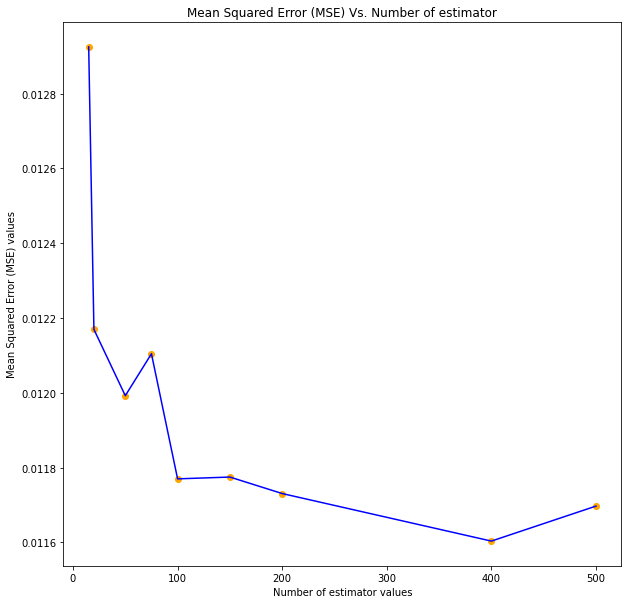

In [66]:
plt.figure(figsize = (10, 10))
sns.lineplot(x = number_of_estimator_values, y = MSE_values, color = 'blue')
plt.scatter(x = number_of_estimator_values, y = MSE_values, color = 'orange')
plt.xlabel("Number of estimator values")
plt.ylabel("Mean Squared Error (MSE) values")
plt.title("Mean Squared Error (MSE) Vs. Number of estimator")
plt.show()

In [67]:
number_of_features_values = [1, 2, 3, 5, 8, 10, 12, 15]
MSE_values = []
for number_of_features in number_of_features_values:
    model = RandomForestRegressor(max_features = number_of_features, random_state = 101)
    cross_validation_score = -cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error').mean()
    MSE_values.append(cross_validation_score)
    

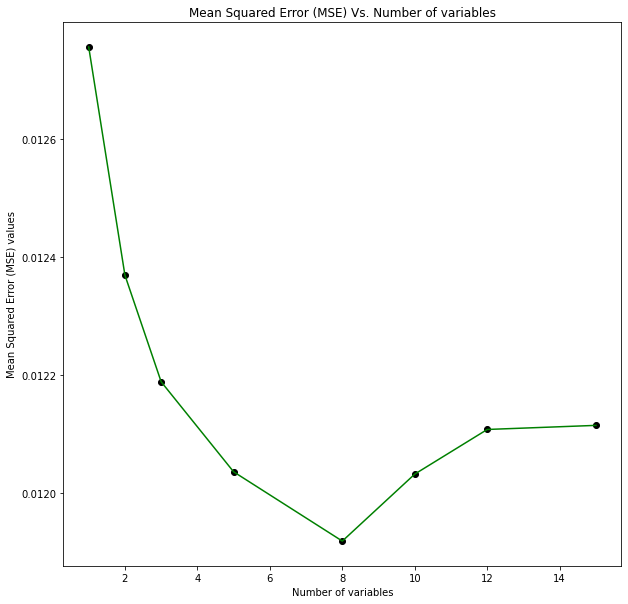

In [68]:
plt.figure(figsize = (10, 10))
sns.lineplot(x = number_of_features_values, y = MSE_values, color = 'green')
plt.scatter(x = number_of_features_values, y = MSE_values, color = 'black')
plt.xlabel("Number of variables")
plt.ylabel("Mean Squared Error (MSE) values")
plt.title("Mean Squared Error (MSE) Vs. Number of variables")
plt.show()

In [69]:
best_number_of_estimators = 50
best_number_of_variables = 5

In [70]:
model = RandomForestRegressor(n_estimators = best_number_of_estimators, max_features = best_number_of_variables, random_state = 101)
model.fit(X_train, y_train)

RandomForestRegressor(max_features=5, n_estimators=50, random_state=101)

In [71]:
y_predictions = model.predict(X_test)

In [72]:
print("The Mean Squared Error of the best Random Forest Regressor is: {}".format(mean_squared_error(y_predictions, y_test)))

The Mean Squared Error of the best Random Forest Regressor is: 0.013377448333565226


## e)

The mean squared error of the best Random Forest Regressor is about 0.0137 respectively. 

After considering the best values of the number of trees which is 50 and the number of variables which is 5, we see that the 
error would reduce from 0.0139 to 0.0137 respectively. 

The most important features according to our random forest regressor are Top25perc, Top10perc and Outstate respectively. 

## Problem 2

In [73]:
columns = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'ham']

In [74]:
df = pd.read_csv('spambase.data', names = columns)

In [75]:
df.shape

(4601, 58)

In [76]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,ham
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [77]:
X = df.drop(['ham'], axis = 1)
y = df['ham']

In [78]:
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [80]:
X_train.shape

(3680, 57)

In [81]:
X_test.shape

(921, 57)

In [82]:
y_train.shape

(3680,)

In [83]:
X_train.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
1328,0.28,0.28,0.56,0.0,0.28,0.28,0.0,1.4,0.28,0.84,...,0.0,0.000,0.284,0.000,1.282,0.094,0.0,3.725,63,339
2937,0.18,0.00,0.18,0.0,0.00,0.00,0.0,0.0,0.94,0.00,...,0.0,0.180,0.167,0.051,0.000,0.025,0.0,4.434,87,909
2338,0.40,0.00,0.40,0.0,0.00,0.00,0.0,0.0,0.00,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,1.148,3,31
2009,0.00,0.00,0.52,0.0,0.52,0.00,0.0,0.0,0.00,2.11,...,0.0,0.171,0.513,0.085,0.000,0.000,0.0,2.225,13,158
4488,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,...,0.0,0.127,0.000,0.000,0.000,0.000,0.0,1.137,3,33


In [84]:
y_train

1328    1
2937    0
2338    0
2009    0
4488    0
       ..
4149    0
1890    0
350     1
79      1
3927    0
Name: ham, Length: 3680, dtype: int64

In [85]:
training_data = pd.concat([X_train, y_train], axis = 1, ignore_index = True)
testing_data = pd.concat([X_test, y_test], axis = 1, ignore_index = True)

In [86]:
training_data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
1328,0.28,0.28,0.56,0.0,0.28,0.28,0.0,1.4,0.28,0.84,...,0.000,0.284,0.000,1.282,0.094,0.0,3.725,63,339,1
2937,0.18,0.00,0.18,0.0,0.00,0.00,0.0,0.0,0.94,0.00,...,0.180,0.167,0.051,0.000,0.025,0.0,4.434,87,909,0
2338,0.40,0.00,0.40,0.0,0.00,0.00,0.0,0.0,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.0,1.148,3,31,0
2009,0.00,0.00,0.52,0.0,0.52,0.00,0.0,0.0,0.00,2.11,...,0.171,0.513,0.085,0.000,0.000,0.0,2.225,13,158,0
4488,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,...,0.127,0.000,0.000,0.000,0.000,0.0,1.137,3,33,0


In [87]:
def max_voting_classifier(elements):
    elements_transpose = elements.T
    y_majority_predictions = []
    for x in elements_transpose:
        elements_list = []
        for y in x:
            elements_list.append(y)
        y_pred = max(set(elements_list), key = elements_list.count)
        y_majority_predictions.append(y_pred)
    return y_majority_predictions

In [113]:
## These empty lists and dictionaries would be used later in the cell
y_prediction_values = []
feature_importance_values = []
log_loss_dict_cross_val = {}
log_loss_dict_train = {}
log_loss_dict_test = {}

## min value is created so that we could use this to determine the lowest cross-validation error 
min_value = 1000

## p value in the number of subsets taken that give the lowest cross-validation error 
p_value = 0 

## These dictionaries are created for allocation of values for dynamic keys
f1_score_dict_cross_val = {}
f1_score_dict_train = {}
f1_score_dict_test = {}

auc_score_dict_cross_val = {}
auc_score_dict_train = {}
auc_score_dict_test = {}

auc_score_dict = {}

y_predictions_list = []

## Cross validation fold that is selected for performing cross-validation below in the cell. 
## provided a low value to reduce the computational cost. 
cv = 3
number_of_trees = [1, 50, 100, 150, 200, 300, 400]
for trees in tqdm(number_of_trees): 
    log_loss_values = []
    f1_score_values_train = []
    f1_score_values_cross_validation = []
    f1_score_values_test = []
    auc_values_train = []
    auc_values_cross_validation = []
    auc_values_test = []
    y_predictions_list = []
    y_predictions_list_train = []
    for i in range(trees):
        count = 0 
        resampled_training_data = resample(training_data, n_samples = 1000, random_state = 42)
        
        X_train_resampled = resampled_training_data.drop([57], axis = 1)
        X_test_resampled = testing_data.drop([57], axis = 1)
        
        y_train_resampled = resampled_training_data[57]
        y_test_resampled = testing_data[57]
        
        subset = X_train_resampled.columns[1:].tolist()
        
        #We would shuffle the values so that probability of selecting various values of subset is equal 
        random.shuffle(subset)
        
        ## The below line would select one subset value based on random selection
        random_subset = random.choice(subset)
        if random_subset == 0:
            random_subset = 1 
            
        ## We would now be using combinations to select different subset of features depending 
        ## on the number of subsets selected.
        for j in combinations(subset, random_subset):
            
            ## This is used to ensure that only one combination of the subset is selected 
            ## as it would be computationally expensive to select all the possible combinations of the subset 
            ## of features
            if count == 1:
                break
            indexes = list(j)
            #print(indexes)
            X_train_subset = X_train_resampled[indexes]
            X_test_subset = X_test_resampled[indexes]
            model = DecisionTreeClassifier(max_depth = 6)
            cross_validation_score = -cross_val_score(model, X_train_subset, y_train_resampled, cv = cv, 
                                                      scoring = 'neg_log_loss').mean()
            if cross_validation_score < min_value:
                min_value = cross_validation_score
                lowest_cross_validation_score = cross_validation_score
                p_value = random_subset
                best_indexes = indexes
            cross_validation_f1_score = cross_val_score(model, X_train_subset, y_train_resampled, cv = cv, 
                                                      scoring = 'f1').mean()
            cross_validation_auc_score = cross_val_score(model, X_train_subset, y_train_resampled, cv = cv, 
                                                      scoring = 'roc_auc').mean()
            
            ## Appending all the cross validation output values to a lists we have created earlier.
            log_loss_values.append(cross_validation_score)
            f1_score_values_cross_validation.append(cross_validation_f1_score)
            auc_values_cross_validation.append(cross_validation_auc_score)
            
            
            model = DecisionTreeClassifier(max_depth = 6)
            model.fit(X_train_subset, y_train_resampled)
            
            y_predictions_train = model.predict(X_train_subset)
            y_predictions = model.predict(X_test_subset)
            count = count + 1
            y_predictions_list.append(y_predictions)
            y_predictions_list_train.append(y_predictions_train)
            
        ## Using the maximum voting classifier that we have defined above.     
        y_predictions_majority = max_voting_classifier(np.array(y_predictions_list))
        y_predictions_majority_train = max_voting_classifier(np.array(y_predictions_list_train))

    log_loss_dict_cross_val["cross_val_loss_trees_" + str(trees)] = np.mean(log_loss_values)
    log_loss_dict_train["training_loss_trees_" + str(trees)] = log_loss(y_predictions_majority_train, y_train_resampled)
    log_loss_dict_test["testing_loss_trees_" + str(trees)] = log_loss(y_predictions_majority, y_test_resampled)
    
    f1_score_dict_cross_val["cross_val_f1_score_trees_" + str(trees)] = np.mean(f1_score_values_cross_validation)
    f1_score_dict_train["training_f1_score_trees_" + str(trees)] = f1_score(y_predictions_majority_train, y_train_resampled)
    f1_score_dict_test["testing_f1_score_trees_" + str(trees)] = f1_score(y_predictions_majority, y_test_resampled)

    auc_score_dict_cross_val["cross_val_auc_scores_trees_" + str(trees)] = np.mean(auc_values_cross_validation)
    auc_score_dict_train["training_auc_scores_trees_" + str(trees)] = roc_auc_score(y_predictions_majority_train,
                                                                                   y_train_resampled)
    auc_score_dict_test["testing_auc_score_trees_" + str(trees)] = roc_auc_score(y_predictions_majority, y_test_resampled)
    

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [02:23<00:00, 20.45s/it]


In [114]:
p_value

24

In [115]:
best_indexes

[41,
 39,
 24,
 16,
 56,
 23,
 13,
 37,
 12,
 31,
 40,
 28,
 19,
 30,
 38,
 27,
 45,
 46,
 26,
 2,
 14,
 5,
 55,
 49]

In [116]:
## This is the lowest cross validation error for 4 subset features. 
lowest_cross_validation_score

0.6203436574749087

In [117]:
f1_score_dict_cross_val

{'cross_val_f1_score_trees_1': 0.8778141191594843,
 'cross_val_f1_score_trees_50': 0.8398797554772631,
 'cross_val_f1_score_trees_100': 0.7949219104168936,
 'cross_val_f1_score_trees_150': 0.8325101780335582,
 'cross_val_f1_score_trees_200': 0.8132592164195236,
 'cross_val_f1_score_trees_300': 0.813843920862534,
 'cross_val_f1_score_trees_400': 0.8088745291640032}

In [118]:
f1_score_dict_train

{'training_f1_score_trees_1': 0.948849104859335,
 'training_f1_score_trees_50': 0.9608355091383811,
 'training_f1_score_trees_100': 0.9553805774278216,
 'training_f1_score_trees_150': 0.9662337662337662,
 'training_f1_score_trees_200': 0.9662337662337662,
 'training_f1_score_trees_300': 0.9635416666666667,
 'training_f1_score_trees_400': 0.9621903520208606}

In [119]:
f1_score_dict_test

{'testing_f1_score_trees_1': 0.863517060367454,
 'testing_f1_score_trees_50': 0.9146005509641872,
 'testing_f1_score_trees_100': 0.9116022099447514,
 'testing_f1_score_trees_150': 0.9100817438692098,
 'testing_f1_score_trees_200': 0.9148351648351648,
 'testing_f1_score_trees_300': 0.9095890410958904,
 'testing_f1_score_trees_400': 0.9143646408839778}

In [120]:
auc_score_dict_cross_val

{'cross_val_auc_scores_trees_1': 0.9073649610896255,
 'cross_val_auc_scores_trees_50': 0.8913769750474146,
 'cross_val_auc_scores_trees_100': 0.8664222491556001,
 'cross_val_auc_scores_trees_150': 0.8849060757907823,
 'cross_val_auc_scores_trees_200': 0.8758992611319539,
 'cross_val_auc_scores_trees_300': 0.8757344817301385,
 'cross_val_auc_scores_trees_400': 0.874819485704258}

In [121]:
auc_score_dict_train

{'training_auc_scores_trees_1': 0.9580041911817201,
 'training_auc_scores_trees_50': 0.9722666666666666,
 'training_auc_scores_trees_100': 0.9691033986261511,
 'training_auc_scores_trees_150': 0.9754672649017033,
 'training_auc_scores_trees_200': 0.9754672649017033,
 'training_auc_scores_trees_300': 0.9738622477870832,
 'training_auc_scores_trees_400': 0.9730632842334971}

In [122]:
auc_score_dict_test

{'testing_auc_score_trees_1': 0.8819934384345149,
 'testing_auc_score_trees_50': 0.9352151746888588,
 'testing_auc_score_trees_100': 0.9334437052918428,
 'testing_auc_score_trees_150': 0.9287041901684197,
 'testing_auc_score_trees_200': 0.9346995571160674,
 'testing_auc_score_trees_300': 0.9296197680784353,
 'testing_auc_score_trees_400': 0.9357504959224158}

In [123]:
log_loss_dict_train

{'training_loss_trees_1': 1.3815670477450321,
 'training_loss_trees_50': 1.0361816825882155,
 'training_loss_trees_100': 1.1743399865575794,
 'training_loss_trees_150': 0.8980233786188524,
 'training_loss_trees_200': 0.8980233786188524,
 'training_loss_trees_300': 0.967102530603534,
 'training_loss_trees_400': 1.0016421065958747}

In [124]:
log_loss_dict_test

{'testing_loss_trees_1': 3.900184067918024,
 'testing_loss_trees_50': 2.325123256432097,
 'testing_loss_trees_100': 2.400127764558787,
 'testing_loss_trees_150': 2.4751270635816978,
 'testing_loss_trees_200': 2.3251223882481336,
 'testing_loss_trees_300': 2.4751287999496245,
 'testing_loss_trees_400': 2.32512412461606}

In [125]:
log_loss_dict_cross_val

{'cross_val_loss_trees_1': 1.2645083387287557,
 'cross_val_loss_trees_50': 1.2226066300681133,
 'cross_val_loss_trees_100': 1.2419316990732454,
 'cross_val_loss_trees_150': 1.2312500881899024,
 'cross_val_loss_trees_200': 1.2551425270903578,
 'cross_val_loss_trees_300': 1.224773610764923,
 'cross_val_loss_trees_400': 1.2327114506310541}

In [126]:
estimator_values = [10, 50, 100]
log_loss_values_train = []
f1_score_values_train = []
auc_score_values_train = []

log_loss_values_test = []
f1_score_values_test = []
auc_score_values_test = []

for estimators in tqdm(estimator_values):
    model = RandomForestClassifier(n_estimators = estimators, random_state = 42)
    model.fit(X_train, y_train)
    y_predictions_train = model.predict(X_train)
    y_predictions_test = model.predict(X_test)
    
    log_loss_values_train.append(log_loss(y_predictions_train, y_train))
    f1_score_values_train.append(f1_score(y_predictions_train, y_train))
    auc_score_values_train.append(roc_auc_score(y_predictions_train, y_train))

    log_loss_values_test.append(log_loss(y_predictions_test, y_test))
    f1_score_values_test.append(f1_score(y_predictions_test, y_test))
    auc_score_values_test.append(roc_auc_score(y_predictions_test, y_test))
    

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.18it/s]


In [127]:
for i, estimators in enumerate(estimator_values):
    print("The number of trees in random forest (n = {})".format(estimators))
    print("Training metrics")
    print("The Log loss of the training data for {} trees: {}".format(estimators, log_loss_values_train[i]))
    print("The f1-score of the training data for {} trees: {}".format(estimators, f1_score_values_train[i]))
    print("The auc score for the training data for {} trees: {}".format(estimators, auc_score_values_train[i]))
    
    print('\n')
    print("Test metrics")
    print("The Log loss of the testing data for {} trees: {}".format(estimators, log_loss_values_test[i]))
    print("The f1-score of the testing data for {} trees: {}".format(estimators, f1_score_values_test[i]))
    print("The auc score for the testing data for {} trees: {}".format(estimators, auc_score_values_test[i]))    
    print('\n')
    print('\n')

The number of trees in random forest (n = 10)
Training metrics
The Log loss of the training data for 10 trees: 0.17832868072342112
The f1-score of the training data for 10 trees: 0.9933636046105484
The auc score for the training data for 10 trees: 0.9953996965806978


Test metrics
The Log loss of the testing data for 10 trees: 1.7250871914185746
The f1-score of the testing data for 10 trees: 0.9380053908355794
The auc score for the testing data for 10 trees: 0.9497462103699623




The number of trees in random forest (n = 50)
Training metrics
The Log loss of the training data for 50 trees: 0.028156828473414646
The f1-score of the training data for 50 trees: 0.9989572471324296
The auc score for the training data for 50 trees: 0.9990819582863925


Test metrics
The Log loss of the testing data for 50 trees: 1.650081815107921
The f1-score of the testing data for 50 trees: 0.9410187667560322
The auc score for the testing data for 50 trees: 0.951227640284244




The number of trees in random

We see that the best reduction in log loss is for 100 trees with the test metrics
with the loss loss equal to 1.612 respectively.

In [128]:
best_number_of_trees = 100
model = RandomForestClassifier(n_estimators = best_number_of_trees, random_state = 42)
model.fit(X_train, y_train)
feature_importance = model.feature_importances_

In [131]:
## This sorts the feature importance values in descending order. In other words, we get the most important feature first.
top_10_feature_indexes = (-feature_importance).argsort()[: 10]

In [132]:
print("The top 10 features of the best random forest model is:\n\n {}".format(X_train.columns[top_10_feature_indexes][:]))

The top 10 features of the best random forest model is:

 Index(['char_freq_!', 'char_freq_$', 'word_freq_remove', 'word_freq_free',
       'capital_run_length_average', 'capital_run_length_longest',
       'capital_run_length_total', 'word_freq_your', 'word_freq_hp',
       'word_freq_you'],
      dtype='object')
